In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
cal= pd.read_csv('calories_consumed.csv')

In [9]:
cal.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [10]:
cal['Calories Consumed'].skew()

0.65492995735887116

(array([ 3.,  1.,  2.,  2.,  1.,  2.,  1.,  0.,  1.,  1.]),
 array([ 1400.,  1650.,  1900.,  2150.,  2400.,  2650.,  2900.,  3150.,
         3400.,  3650.,  3900.]),
 <a list of 10 Patch objects>)

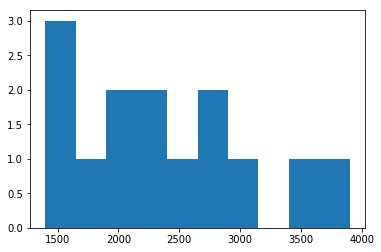

In [11]:
plt.hist(cal['Calories Consumed'])

In [12]:
cal['Calories Consumed'].kurt()

-0.29048129735135975

In [13]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weight gained (grams)    14 non-null int64
Calories Consumed        14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


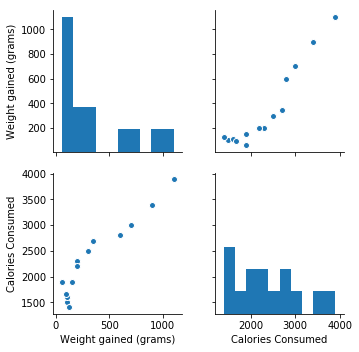

In [14]:
sns.pairplot(cal)

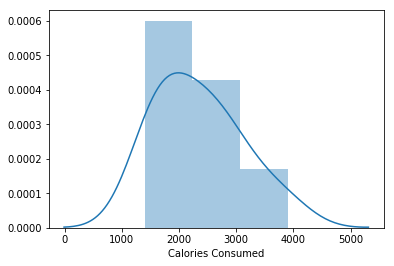

In [15]:
sns.distplot(cal['Calories Consumed'])

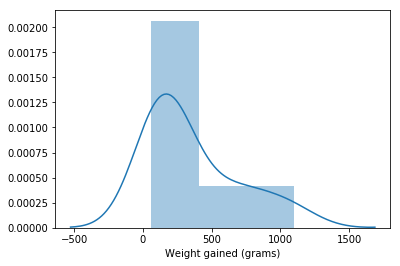

In [16]:
sns.distplot(cal['Weight gained (grams)'])

In [17]:
cal.corr()

,Weight gained (grams),Calories Consumed
Weight gained (grams),1.000000,0.946991
Calories Consumed,0.946991,1.000000


In [28]:
X = cal['Calories Consumed'].values.reshape(-1,1)
print(X)

Y = cal['Weight gained (grams)'].values.reshape(-1,1)
print(Y)

[[1500]
 [2300]
 [3400]
 [2200]
 [2500]
 [1600]
 [1400]
 [1900]
 [2800]
 [3900]
 [1670]
 [1900]
 [2700]
 [3000]]
[[ 108]
 [ 200]
 [ 900]
 [ 200]
 [ 300]
 [ 110]
 [ 128]
 [  62]
 [ 600]
 [1100]
 [ 100]
 [ 150]
 [ 350]
 [ 700]]


In [29]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(X_train,Y_train)

In [56]:
print(lm.intercept_)

[-605.52112676]


In [40]:
print(lm.coef_)

[[ 0.41165764]]


In [52]:
model.score(X_train,Y_train)   #R^2 value = 0.8908

0.89083451144059522

In [48]:
predictions = model.predict(X_test)

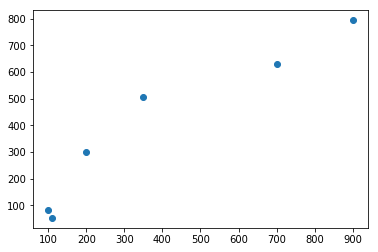

In [50]:
plt.scatter(Y_test,predictions)

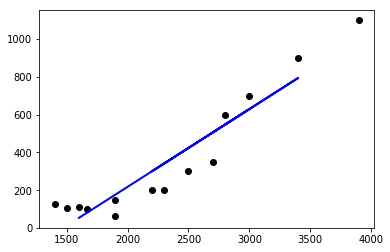

In [58]:
plt.scatter(
    cal['Calories Consumed'],
    cal['Weight gained (grams)'],
    c='black'
)
plt.plot(
    X_test,
    predictions,
    c='blue',
    linewidth=2
)

In [59]:
from sklearn import metrics

In [61]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))

MAE 84.5725532683


In [62]:
print('MSE',metrics.mean_squared_error(Y_test,predictions))

MSE 9015.94191062


In [64]:
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE 94.9523138771
